In [1]:
import numpy as np
import os
import glob

path="C:\\Users\\yexue\\PycharmProjects\\webcamHR"
extension = 'csv'
os.chdir(path)
result = glob.glob('*.{}'.format(extension))
result

['Webcam-pulse2020-09-04 15_50_48_803605.csv',
 'Webcam-pulse2020-09-04 15_50_53_323502.csv',
 'Webcam-pulse2020-09-04 15_50_57_376119.csv',
 'Webcam-pulse2020-09-04 15_51_03_243797.csv',
 'Webcam-pulse2020-09-04 15_57_46_985869.csv',
 'Webcam-pulse2020-09-04 15_57_54_371326.csv',
 'Webcam-pulse2020-09-04 15_58_01_237150.csv',
 'Webcam-pulse2020-09-04 15_58_05_995020.csv',
 'Webcam-pulse2020-09-04 15_58_09_881570.csv']

In [2]:
import cv2
import matplotlib.pyplot as plt

data=np.loadtxt(os.path.join(path,result[-1]),delimiter=",").transpose()
#print(len(data[2]),len(data[1]))
x=np.linspace(0,len(data[0]),len(data[0]))
# plt.plot(x,data[0])
L=len(data[0])
# plt.plot(x,data[1])
# plt.plot(x,data[2])
# plt.plot(x,data[3])
plt.plot(data[0],data[1],c = "r")
# plt.plot(data[0],data[2],c="g")
# plt.plot(data[0],data[3],c="b")

#np.argmax(data)

In [3]:
from sklearn.decomposition import FastICA
X=data[1:]
transformer = FastICA(n_components=3,
        random_state=0)
X_transformed = transformer.fit_transform(X)
A_ = ica.mixing_
A_
X_transformed.shape
# X_transformed

NameError: name 'ica' is not defined

In [4]:
X_ = np.matmul(np.linalg.inv(X_transformed),X)
X_.shape

(3, 250)

C:\Users\yexue\Anaconda3\lib\site-packages\IPython\core\events.py:88: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  func(*args, **kwargs)


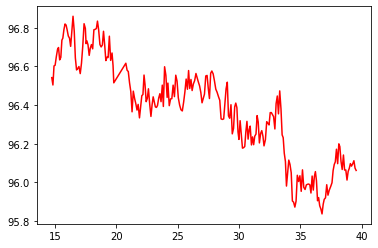

In [5]:
plt.plot(data[0],X_[0],c="R")
# plt.plot(data[0],X_[1],c="g")
# plt.plot(data[0],X_[2],c="B")

C:\Users\yexue\Anaconda3\lib\site-packages\sklearn\decomposition\fastica_.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


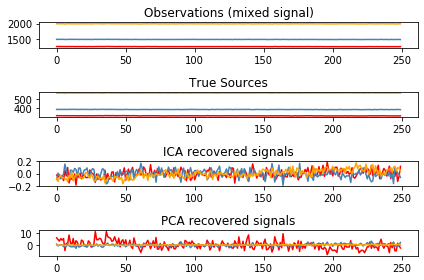

In [6]:
import numpy as np
import matplotlib.pyplot as plt


from sklearn.decomposition import FastICA, PCA

# #############################################################################
# Generate sample data
np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 8, n_samples)

# s1 = np.sin(2 * time)  # Signal 1 : sinusoidal signal
# s2 = np.sign(np.sin(3 * time))  # Signal 2 : square signal
# s3 = signal.sawtooth(2 * np.pi * time)  # Signal 3: saw tooth signal
s1 = data[1]
s2 = data[2]
s3 = data[3]

S = np.c_[s1, s2, s3]
S += 0.2 * np.random.normal(size=S.shape)  # Add noise

S /= S.std(axis=0)  # Standardize data
# Mix data
A = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]])  # Mixing matrix
X = np.dot(S, A.T)  # Generate observations

# Compute ICA
ica = FastICA(n_components=3)
S_ = ica.fit_transform(X)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix

# We can `prove` that the ICA model applies by reverting the unmixing.
assert np.allclose(X, np.dot(S_, A_.T) + ica.mean_)

# For comparison, compute PCA
pca = PCA(n_components=3)
H = pca.fit_transform(X)  # Reconstruct signals based on orthogonal components

# #############################################################################
# Plot results

plt.figure()

models = [X, S, S_, H]
names = ['Observations (mixed signal)',
         'True Sources',
         'ICA recovered signals',
         'PCA recovered signals']
colors = ['red', 'steelblue', 'orange']

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)

plt.tight_layout()
plt.show()

In [ ]:
from scipy import fftpack
x = data[2]
X = fftpack.fft(x)
print(len(x),f_s)
freqs=fftpack.rfftfreq(len(x))*f_s
print(freqs)
#np.abs(X)
fig, ax=plt.subplots()
ax.set_xlabel("Frequency")
ax.set_ylabel("frequency domain")
ax.stem(freqs,np.abs(X))

[  0.    2.4   4.8   7.2   9.6  12.   14.4  16.8  19.2  21.6  24.   26.4
  28.8  31.2  33.6  36.   38.4  40.8  43.2  45.6  48.   50.4  52.8  55.2
  57.6  60.   62.4  64.8  67.2  69.6  72.   74.4  76.8  79.2  81.6  84.
  86.4  88.8  91.2  93.6  96.   98.4 100.8 103.2 105.6 108.  110.4 112.8
 115.2 117.6 120.  122.4 124.8 127.2 129.6 132.  134.4 136.8 139.2 141.6
 144.  146.4 148.8 151.2 153.6 156.  158.4 160.8 163.2 165.6 168.  170.4
 172.8 175.2 177.6 180.  182.4 184.8 187.2 189.6 192.  194.4 196.8 199.2
 201.6 204.  206.4 208.8 211.2 213.6 216.  218.4 220.8 223.2 225.6 228.
 230.4 232.8 235.2 237.6 240.  242.4 244.8 247.2 249.6 252.  254.4 256.8
 259.2 261.6 264.  266.4 268.8 271.2 273.6 276.  278.4 280.8 283.2 285.6
 288.  290.4 292.8 295.2 297.6 300. ]


C:\Users\yexue\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


10


72.0

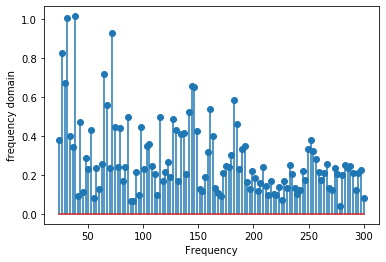

In [7]:
times = data[0]
green = X_[2]
L = len(data[0])
even_times = np.linspace(times[0], times[-1], L)
interpolated = np.interp(even_times, times, green)
interpolated = np.hamming(L) * interpolated  # a wave with width L * interpolated value
interpolated = interpolated - np.mean(interpolated)  # standardisation?
raw = np.fft.rfft(interpolated)
peak = np.abs(raw)

freqs = np.fft.rfftfreq(len(times))*10*60
# freqs = float(fps) / L * np.arange(L / 2 + 1) *60
print(freqs)
fig, ax=plt.subplots()
ax.set_xlabel("Frequency")
ax.set_ylabel("frequency domain")
ax.stem(freqs[10:],np.abs(raw[10:]))
print(np.argmax(peak[20:]))
freqs[20+np.argmax(peak[20:])]

In [8]:
fps = float(L) / (times[-1] - times[0])  # float, frames per second, rate of taking loop

freqs = float(fps) / L * np.arange(L / 2 + 1)  # due to output size of fft.rfft()
freqs

array([0.        , 0.04032705, 0.0806541 , 0.12098115, 0.1613082 ,
       0.20163525, 0.2419623 , 0.28228935, 0.3226164 , 0.36294345,
       0.4032705 , 0.44359755, 0.4839246 , 0.52425165, 0.5645787 ,
       0.60490575, 0.6452328 , 0.68555985, 0.7258869 , 0.76621395,
       0.806541  , 0.84686805, 0.8871951 , 0.92752215, 0.9678492 ,
       1.00817625, 1.0485033 , 1.08883035, 1.1291574 , 1.16948445,
       1.2098115 , 1.25013855, 1.2904656 , 1.33079265, 1.3711197 ,
       1.41144675, 1.4517738 , 1.49210085, 1.5324279 , 1.57275495,
       1.613082  , 1.65340905, 1.6937361 , 1.73406315, 1.7743902 ,
       1.81471725, 1.8550443 , 1.89537135, 1.9356984 , 1.97602545,
       2.0163525 , 2.05667955, 2.0970066 , 2.13733365, 2.1776607 ,
       2.21798775, 2.2583148 , 2.29864185, 2.3389689 , 2.37929595,
       2.419623  , 2.45995005, 2.5002771 , 2.54060415, 2.5809312 ,
       2.62125825, 2.6615853 , 2.70191235, 2.7422394 , 2.78256645,
       2.8228935 , 2.86322055, 2.9035476 , 2.94387465, 2.98420